In [1]:
import rasterio as rio
import earthpy as et
#import earthpy.spatial as es
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Introdução rasterio

In [84]:
banda6 = rio.open('../Dados/landsat/g_b6.tif')

In [3]:
banda6.name

'../Dados/landsat/b6.tif'

In [5]:
banda6.mode

'r'

In [6]:
banda6.count

2

In [7]:
banda6.width

1456

In [8]:
banda6.height

1327

In [9]:
#limites
banda6.bounds

BoundingBox(left=649630.6276513692, bottom=-2526375.3756967764, right=693310.6276513692, top=-2486565.3756967764)

In [85]:
banda6.transform

Affine(30.0, 0.0, 647235.0,
       0.0, -30.0, 7515265.0)

In [86]:
banda6.transform * (0,0)

(647235.0, 7515265.0)

In [87]:
banda6.crs

CRS.from_dict(init='epsg:32623')

# Trabalhando com array

In [16]:
b6=banda6.read(1)

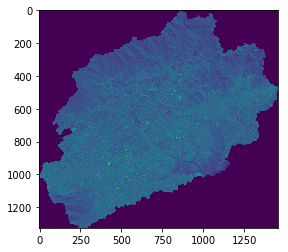

In [18]:
plt.imshow(b6)

In [88]:
b6.shape

(1482, 1614)

In [24]:
b6L=b6.ravel()

In [26]:
b6M = b6L.reshape(1327, 1456)

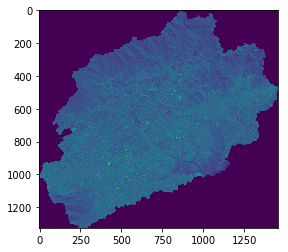

In [27]:
plt.imshow(b6M)

# Abrindo as bandas 

In [66]:
b2 = rio.open('../Dados/landsat/g_b2.tif').read(1)
b3 = rio.open('../Dados/landsat/g_b3.tif').read(1)
b6 = rio.open('../Dados/landsat/g_b6.tif').read(1)
ndvi = rio.open('../Dados/landsat/g_ndvi.tif').read(1)


In [5]:
from sklearn.preprocessing import StandardScaler

In [67]:
Stand = StandardScaler()
b2 = Stand.fit(b2).transform(b2)
b3 = Stand.fit(b3).transform(b3)
b6 = Stand.fit(b6).transform(b6)

/home/pensario/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pensario/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pensario/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pensario/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pensario/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Da

In [68]:
df = pd.DataFrame({'b2':b2.ravel(),'b3':b3.ravel(),'b6':b6.ravel(),'ndvi':ndvi.ravel()})

# Aplicando modelos

In [9]:
# carregando 
from sklearn.externals import joblib

In [116]:
tree_d = joblib.load('../modelos/three_d.pk1')
randon_f = joblib.load('../modelos/randon_f.pk1')
svc  = joblib.load('../modelos/SVC.pk1')
knn = joblib.load('../modelos/knn.pk1')

In [12]:
import time


In [32]:
#tempo_treino = [] # tree_d, knn, svc,
#tempo_treino

[194.01834699999995]

In [133]:
t1=time.clock()
m1 = randon_f.predict(df.values)
t2=time.clock()
tf = t2-t1
tempo_treino.append(tf)
print(tf)

291.8957530000007


In [135]:
tempo_treino[5]/60

4.864929216666678

In [100]:
tempo_treino[3]/60

10.070725733333331

In [137]:
# transformando os dados categoricos
le = joblib.load('../modelos/inverse.pk1')

In [121]:
m1[500160]

array([0, 0, 0, 1, 0, 0, 0, 0, 0])

In [138]:
m1 = le.inverse_transform(m1)

In [141]:
m1[1721000]

'URBANO'

In [25]:
#tempo_transf = [1647.996646]

In [142]:
t1=time.clock()
clf =np.array([])

for i in m1:
    if i=='AGRICULTURA':
        c = 1    
    if i =='AUMIDAS':
        c=2    
    if i=='FLORESTA':
        c=3
    if i=='MANGUE':
        c=4
    if i=='PASTAGEM':
        c=5
    if i=='URBANO':
        c=6
    if i=='SOLO':
        c=7   
    if i=='AGUA':
        c=8   
    if i=='ROCHA':
        c=9   
    clf=np.append(clf,c)
    
t2=time.clock()
tf = t2-t1
tempo_transf.append(tf)
print(tf)

3076.0075429999997


In [143]:
tempo_transf[6]/60


51.26679238333333

In [144]:
clfm =clf.reshape(1482, 1614)
    

In [129]:
clfm.shape

(1482, 1614)

In [145]:
modelo1 = rio.open('../Dados/landsat/randon_f.tif','w', driver='GTiff',
                  height=clfm.shape[0],width=clfm.shape[1],
                  count=1, dtype=clfm.dtype,
                  crs='+proj=latlong',transform=banda6.transform)

In [146]:
modelo1.write(clfm,1)
modelo1.close()

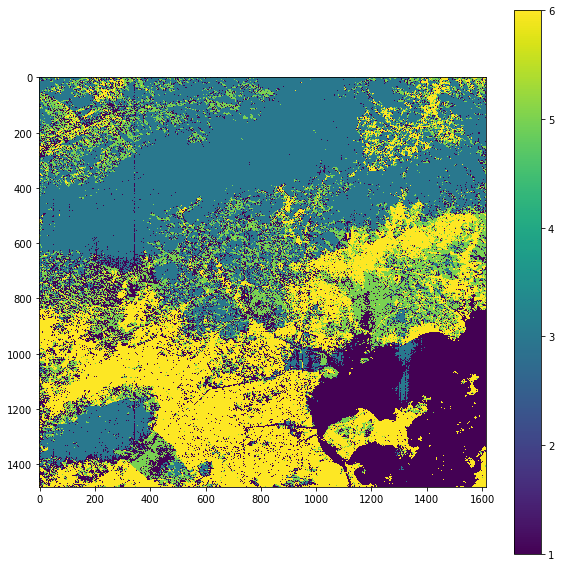

In [147]:
plt.figure(figsize=(10,10))
plt.imshow(clfm)
plt.colorbar()